# STOCK MARKET PREDICTION

## IMPORTING THE LIBRARIES
- **numpy** for numerical operations
- **pandas** data manipulation and analysis
- **yfinance** for downloading stock data
- **matplotlib.pyplot** for plotting graphs

In [1]:
import numpy as np
import pandas as pd

# Import YFinance Library
import yfinance as yf

# Download Stock Prices for Training and Testing from YFinance

## 1) Download Stock Data for Training (train_df)

In [2]:
# Download Stock Prices

# Ticker and start date, end date for Training 
stock_symbol = 'TATAMOTORS.NS'
train_start_date = '2024-01-18'
train_end_date = '2024-03-01'

# Download Stock Price Data from Yahoo Finance
train_df = yf.download(stock_symbol, start=train_start_date, end=train_end_date, progress=False)
train_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-18,807.000000,822.950012,797.000000,819.049988,819.049988,11500495
2024-01-19,823.849976,826.000000,819.500000,823.549988,823.549988,5706888
2024-01-23,824.900024,827.599976,796.299988,800.450012,800.450012,9436209
2024-01-24,802.400024,812.000000,788.500000,810.900024,810.900024,7217542
2024-01-25,814.000000,814.150024,800.299988,811.849976,811.849976,10109720
2024-01-29,811.849976,843.799988,811.049988,841.000000,841.000000,12823686
2024-01-30,843.000000,885.950012,842.849976,858.849976,858.849976,19734613
2024-01-31,865.200012,896.500000,865.200012,884.200012,884.200012,24562392
2024-02-01,900.000000,900.150024,876.299988,878.500000,878.500000,14505885


In [3]:
train_input = yf.download(stock_symbol, start='2024-02-20', end=train_end_date, progress=False)

def calculate_trend_and_fluctuations(df, window_size=3):
    trend = 0
    fluctuations = 0
    for i in range(len(df) - window_size + 1):
        window = df['Close'].iloc[i:i+window_size]
        if all(window.iloc[i] < window.iloc[i+1] for i in range(len(window) - 1)):
            trend += 1
        elif all(window.iloc[i] > window.iloc[i+1] for i in range(len(window) - 1)):
            trend += 1
        else:
            fluctuations += 1
    print("T",trend)
    print("F",fluctuations)
    if trend > fluctuations:
        return "Trend"
    else:
        return "Fluctuations"

# Calculate trend and fluctuations for train_df
result = calculate_trend_and_fluctuations(train_input)
if result == 'Fluctuations':
    train_df = train_input
train_df

T 2
F 4


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-20,934.450012,934.650024,920.400024,926.349976,926.349976,4733639
2024-02-21,926.349976,937.200012,916.500000,921.049988,921.049988,6011018
2024-02-22,924.650024,933.849976,914.599976,932.299988,932.299988,6437014
2024-02-23,933.099976,939.799988,929.400024,937.400024,937.400024,7047473
2024-02-26,937.099976,945.000000,930.700012,936.950012,936.950012,5600234
2024-02-27,936.750000,965.000000,935.500000,962.700012,962.700012,12810206
2024-02-28,966.150024,976.000000,950.299988,958.049988,958.049988,15219187
2024-02-29,959.000000,959.250000,942.900024,950.200012,950.200012,10346657


## 2) Downloading Stock Data for Testing (test_df)

In [4]:
# Download Stock Data from Predicting

# Ticker and start date, end date for Predicting 
test_start_date = '2024-03-01'
test_end_date = '2024-03-16'

# Download Stock Price Data from Yahoo Finance
test_df = yf.download(stock_symbol, start=test_start_date, end=test_end_date, progress=False)
print(test_df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-01   958.950012   980.400024   956.700012   977.400024   977.400024   
2024-03-04   993.250000   995.000000   980.099976   987.200012   987.200012   
2024-03-05  1027.000000  1065.599976  1005.349976  1021.900024  1021.900024   
2024-03-06  1025.000000  1030.650024  1009.000000  1017.650024  1017.650024   
2024-03-07  1025.000000  1047.000000  1014.049988  1039.300049  1039.300049   
2024-03-11  1034.750000  1035.949951  1021.000000  1028.000000  1028.000000   
2024-03-12  1027.800049  1037.000000  1011.299988  1016.500000  1016.500000   
2024-03-13  1019.000000  1021.000000   963.549988   973.200012   973.200012   
2024-03-14   964.950012   982.000000   955.400024   967.750000   967.750000   
2024-03-15   968.400024   979.750000   940.000000   945.849976   945.849976   

              Volume  
Date                  
2024-

In [5]:
# Extract Close Price from Training data
prices_to_train = train_df[['Close', 'Open', 'Low', 'High']].to_numpy()
print(prices_to_train)

[[926.34997559 934.45001221 920.40002441 934.65002441]
 [921.04998779 926.34997559 916.5        937.20001221]
 [932.29998779 924.65002441 914.59997559 933.84997559]
 [937.40002441 933.09997559 929.40002441 939.79998779]
 [936.95001221 937.09997559 930.70001221 945.        ]
 [962.70001221 936.75       935.5        965.        ]
 [958.04998779 966.15002441 950.29998779 976.        ]
 [950.20001221 959.         942.90002441 959.25      ]]


## Extracting Working Days for which we want to predict the stock prices

In [6]:
# Extract dates to predict
prediction_dates = test_df.index
print(prediction_dates)

DatetimeIndex(['2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [7]:
from sklearn.feature_selection import f_regression

# Calculate SMA
sma = train_df['Close'].rolling(window=5, min_periods=1).mean()
# Convert Series to numpy array and reshape
sma_array = sma.to_numpy().reshape(-1, 1)

# Calculate EMA
ema = train_df['Close'].ewm(span=5, adjust=False).mean()
ema_array = ema.to_numpy().reshape(-1, 1)

# Calculate DEMA
dema = 2 * ema - ema.ewm(span=5, adjust=False).mean()
dema_array = dema.to_numpy().reshape(-1, 1)

# Add values as a column at the end of the numpy array
prices_to_train = np.hstack((prices_to_train, sma_array, ema_array, dema_array))

print(prices_to_train)

[[926.34997559 934.45001221 920.40002441 934.65002441 926.34997559
  926.34997559 926.34997559]
 [921.04998779 926.34997559 916.5        937.20001221 923.69998169
  924.58331299 923.40553792]
 [932.29998779 924.65002441 914.59997559 933.84997559 926.56665039
  927.15553792 928.08517117]
 [937.40002441 933.09997559 929.40002441 939.79998779 929.2749939
  930.57036675 933.4666748 ]
 [936.95001221 937.09997559 930.70001221 945.         930.80999756
  932.69691524 936.04548626]
 [962.70001221 936.75       935.5        965.         938.08000488
  942.69794756 951.59768313]
 [958.04998779 966.15002441 950.29998779 976.         945.48000488
  947.8152943  957.16001584]
 [950.20001221 959.         942.90002441 959.25       949.06000977
  948.61020027 955.36995194]]


In [8]:
# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(prices_to_train, columns=['Open','High','Low','Close','SMA','EMA','DEMA'])
df.index = train_df.index
# Display the DataFrame
print(df)


                  Open        High         Low       Close         SMA  \
Date                                                                     
2024-02-20  926.349976  934.450012  920.400024  934.650024  926.349976   
2024-02-21  921.049988  926.349976  916.500000  937.200012  923.699982   
2024-02-22  932.299988  924.650024  914.599976  933.849976  926.566650   
2024-02-23  937.400024  933.099976  929.400024  939.799988  929.274994   
2024-02-26  936.950012  937.099976  930.700012  945.000000  930.809998   
2024-02-27  962.700012  936.750000  935.500000  965.000000  938.080005   
2024-02-28  958.049988  966.150024  950.299988  976.000000  945.480005   
2024-02-29  950.200012  959.000000  942.900024  959.250000  949.060010   

                   EMA        DEMA  
Date                                
2024-02-20  926.349976  926.349976  
2024-02-21  924.583313  923.405538  
2024-02-22  927.155538  928.085171  
2024-02-23  930.570367  933.466675  
2024-02-26  932.696915  936.045486  


In [9]:
# Calculate SMA
test_df['SMA'] = test_df['Close'].rolling(window=5, min_periods=1).mean()

# Calculate EMA
test_df['EMA'] = test_df['Close'].ewm(span=5, adjust=False).mean()

# Calculate DEMA
test_df['DEMA'] = 2 * test_df['EMA'] - test_df['EMA'].ewm(span=5, adjust=False).mean()

test_df

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,DEMA
Date,,,,,,,,,
2024-03-01,958.950012,980.400024,956.700012,977.400024,977.400024,10645369,977.400024,977.400024,977.400024
2024-03-04,993.250000,995.000000,980.099976,987.200012,987.200012,6084495,982.300018,980.666687,982.844462
2024-03-05,1027.000000,1065.599976,1005.349976,1021.900024,1021.900024,59811033,995.500020,994.411133,1005.025947
2024-03-06,1025.000000,1030.650024,1009.000000,1017.650024,1017.650024,14214823,1001.037521,1002.157430,1014.398171
2024-03-07,1025.000000,1047.000000,1014.049988,1039.300049,1039.300049,16877082,1008.690027,1014.538303,1030.952712
2024-03-11,1034.750000,1035.949951,1021.000000,1028.000000,1028.000000,7502450,1018.810022,1019.025535,1032.959963
2024-03-12,1027.800049,1037.000000,1011.299988,1016.500000,1016.500000,8763820,1024.670020,1018.183690,1026.912079
2024-03-13,1019.000000,1021.000000,963.549988,973.200012,973.200012,16564155,1014.930017,1003.189131,999.011684
2024-03-14,964.950012,982.000000,955.400024,967.750000,967.750000,22931801,1004.950012,991.376087,980.715760


## Import Library for Ridge regression model from scikit-learn

In [10]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## Initialize an empty dictionary to store predicted prices " predicted_price = {} " ##

In [11]:
rr_predicted_price = {}
svr_predicted_price = {}
knn_predicted_price = {}
dt_predicted_price = {}
rf_predicted_price = {}
ann_predicted_price = {}

# Using Sliding Window Approach to predict {Close, Open, High, Low}
## -> Loop through each date in the "prediction_dates" then train the model and make prediction of next day's {Close, Open, High, Low} and then include this prediction in feature data and remove the oldest one and again trained the model -  #

## 1) Prepare 'features' (every days' {Close, Open, High, Low}) and 'targets' (next day's {Close, Open, High, Low}) for training the models:

- **train_features = []** - List to store the features (everyday {Close, Open, High, Low})
- **train_targets = []** - List to store the targets (next day's {Close, Open, High, Low})
- **for date in prediction_dates:** - Loop through each day to predict
- **train_features = train_data[:-1]** - Add every days' {Close, Open, High, Low} to features (from first to 2nd last)
- **train_targets = train_data[1:]** - Add the next day's {Close, Open, High, Low} to targets (from second to last)

## 2) Train all the models
### For Example:
- **model = Ridge(alpha=10)** -  Create a Ridge regression model with alpha (regularization strength) set to higher values
- **model.fit(train_features, train_targets)** - Train the model on the features and targets

## 3) Make predictions for the next day's {Close, Open, High, Low}:
- **target_to_predict = train_targets[-1]** -  Get the {Close, Open, High, Low}
- **rr_predict = model_rr.predict(target_to_predict.reshape(1, -1))** - Predict the next day's prces
- **rr_predicted_price[date] = rr.predict[-1]** -Store the predicted price for the current day

## 4) Update the prices_to_train for the next iteration:
- **train_data = train_data[1:]:]** - Remove the first element from the training data
- **specific_date_row = test_df.loc[test_df.index == date, ['Close', 'Open', 'Low', 'High']].to_numpy()1]** - Add the predicted price to the training data for the next iterationte

In [12]:
for date in prediction_dates:
    
    train_features = prices_to_train[:-1]
    train_targets = prices_to_train[1:, :4]
    
    print(f"================ Date :  {date} ========================")
    print(f"\n=============== Training Dataset : ===================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    print(prices_to_train)
    print(f"\n============================================ Features & Targets =====================================================")
    print()
    print("----------------------Features--------------------------- | -----------------------Targets------------------------------")
    for feature, target in zip(train_features, train_targets):
        print(f"{feature} | {target}")
    
    model_rr = Ridge(alpha=10)
    model_rr.fit(train_features, train_targets)

    model_svr = MultiOutputRegressor(SVR(kernel='rbf', C=1e3))
    model_svr.fit(train_features, train_targets)

    model_knn = KNeighborsRegressor(n_neighbors=5)
    model_knn.fit(train_features, train_targets)

    model_dt = DecisionTreeRegressor()
    model_dt.fit(train_features, train_targets)
    
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(train_features, train_targets)

    model_ann = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
    model_ann.fit(train_features, train_targets)
    
    target_to_predict = prices_to_train[-1]
    
    rr_predict = model_rr.predict(target_to_predict.reshape(1, -1))
    rr_predicted_price[date] = rr_predict[-1]

    svr_predict = model_svr.predict(target_to_predict.reshape(1, -1))
    svr_predicted_price[date] = svr_predict[-1]

    knn_predict = model_knn.predict(target_to_predict.reshape(1, -1))
    knn_predicted_price[date] = knn_predict[-1]

    dt_predict = model_dt.predict(target_to_predict.reshape(1, -1))
    dt_predicted_price[date] = dt_predict[-1]

    rf_predict = model_rf.predict(target_to_predict.reshape(1, -1))
    rf_predicted_price[date] = rf_predict[-1]

    ann_predict = model_ann.predict(target_to_predict.reshape(1, -1))
    ann_predicted_price[date] = ann_predict[-1]
    
    print()
    print("================ Features for Prediction : ==================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    print(target_to_predict)
    print()

    print("================ Predicted Prices : ========================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    print(rr_predict)
    print()

    prices_to_train = prices_to_train[1:]
    specific_date_row = test_df.loc[test_df.index == date, ['Close', 'Open', 'Low', 'High', 'SMA', 'EMA', 'DEMA']].to_numpy()
    # Add the specific_date_row to prices_to_train
    prices_to_train = np.append(prices_to_train, specific_date_row, axis=0)
    

================ Date :  2024-03-01 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[926.34997559 934.45001221 920.40002441 934.65002441 926.34997559
  926.34997559 926.34997559]
 [921.04998779 926.34997559 916.5        937.20001221 923.69998169
  924.58331299 923.40553792]
 [932.29998779 924.65002441 914.59997559 933.84997559 926.56665039
  927.15553792 928.08517117]
 [937.40002441 933.09997559 929.40002441 939.79998779 929.2749939
  930.57036675 933.4666748 ]
 [936.95001221 937.09997559 930.70001221 945.         930.80999756
  932.69691524 936.04548626]
 [962.70001221 936.75       935.5        965.         938.08000488
  942.69794756 951.59768313]
 [958.04998779 966.15002441 950.29998779 976.         945.48000488
  947.8152943  957.16001584]
 [950.20001221 959.         942.90002441 959.25       949.06000977
  948.61020027 955.36995194]]

============================================ 

In [13]:
# Create a DataFrame from the predicted prices dictionary
rr_predicted_prices = pd.DataFrame(rr_predicted_price.values(), index=rr_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(rr_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
svr_predicted_prices = pd.DataFrame(svr_predicted_price.values(), index=svr_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(svr_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
knn_predicted_prices = pd.DataFrame(knn_predicted_price.values(), index=knn_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(knn_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
dt_predicted_prices = pd.DataFrame(dt_predicted_price.values(), index=dt_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(dt_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
rf_predicted_prices = pd.DataFrame(rf_predicted_price.values(), index=rf_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(rf_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
ann_predicted_prices = pd.DataFrame(ann_predicted_price.values(), index=ann_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(ann_predicted_prices)

            Predicted Close   Predicted Open  Predicted Low  Predicted High
2024-03-01       962.790861       951.167032     949.363028      961.310036
2024-03-04      1039.081902      1005.246553    1003.046223     1053.491095
2024-03-05       971.855658       995.382363     975.307106      983.690986
2024-03-06       984.414199      1044.242301     990.079742     1031.526435
2024-03-07      1026.088347      1070.326983    1029.427985     1090.863859
2024-03-11      1046.786730      1028.779064    1021.553978     1038.424531
2024-03-12      1071.738843      1040.645425    1037.007396     1072.894779
2024-03-13       992.292557      1015.494800     996.632006     1011.184391
2024-03-14       907.523813       996.297211     886.191158     1002.191916
2024-03-15       910.173983      1015.623047     913.491360     1030.320591
            Predicted Close   Predicted Open  Predicted Low  Predicted High
2024-03-01       966.956898       957.013979     945.841021      973.533719
2024-03-04  

## Prepare the actual prices DataFrame
- **actual_prices = test_df['Close']** - Get the actual closing prices for the test data

In [14]:
# Actual Prices
actual_prices = test_df[['Close', 'Open', 'Low', 'High']]
print(actual_prices)    

                  Close         Open          Low         High
Date                                                          
2024-03-01   977.400024   958.950012   956.700012   980.400024
2024-03-04   987.200012   993.250000   980.099976   995.000000
2024-03-05  1021.900024  1027.000000  1005.349976  1065.599976
2024-03-06  1017.650024  1025.000000  1009.000000  1030.650024
2024-03-07  1039.300049  1025.000000  1014.049988  1047.000000
2024-03-11  1028.000000  1034.750000  1021.000000  1035.949951
2024-03-12  1016.500000  1027.800049  1011.299988  1037.000000
2024-03-13   973.200012  1019.000000   963.549988  1021.000000
2024-03-14   967.750000   964.950012   955.400024   982.000000
2024-03-15   945.849976   968.400024   940.000000   979.750000


## Combine the actual and predicted prices DataFrames ##
- **result_df = pd.concat([actual_prices, predicted_prices], axis=1)** - Combine actual and predicted prices into a single DataFrame
- **result_df.columns = ['Actual', 'Predicted']** - Rename the columns for clarityrity

In [15]:
# Combine actual_prices and predicted_prices DataFrames
result_df = pd.concat([actual_prices, rr_predicted_prices, svr_predicted_prices, knn_predicted_prices, dt_predicted_prices, rf_predicted_prices, ann_predicted_prices], axis=1)
result_df.columns = ['Actual Close', 'Actual Open', 'Actual Low', 'Actual High', 'RR Predicted Close', 'RR Predicted Open', 'RR Predicted Low', 'RR Predicted High', 'SVR Predicted Close', 'SVR Predicted Open', 'SVR Predicted Low', 'SVR Predicted High', 'KNN Predicted Close', 'KNN Predicted Open', 'KNN Predicted Low', 'KNN Predicted High', 'DT Predicted Close', 'DT Predicted Open', 'DT Predicted Low', 'DT Predicted High', 'RF Predicted Close', 'RF Predicted Open', 'RF Predicted Low', 'RF Predicted High', 'ANN Predicted Close', 'ANN Predicted Open', 'ANN Predicted Low', 'ANN Predicted High']
print(result_df)

            Actual Close  Actual Open   Actual Low  Actual High  \
2024-03-01    977.400024   958.950012   956.700012   980.400024   
2024-03-04    987.200012   993.250000   980.099976   995.000000   
2024-03-05   1021.900024  1027.000000  1005.349976  1065.599976   
2024-03-06   1017.650024  1025.000000  1009.000000  1030.650024   
2024-03-07   1039.300049  1025.000000  1014.049988  1047.000000   
2024-03-11   1028.000000  1034.750000  1021.000000  1035.949951   
2024-03-12   1016.500000  1027.800049  1011.299988  1037.000000   
2024-03-13    973.200012  1019.000000   963.549988  1021.000000   
2024-03-14    967.750000   964.950012   955.400024   982.000000   
2024-03-15    945.849976   968.400024   940.000000   979.750000   

            RR Predicted Close  RR Predicted Open  RR Predicted Low  \
2024-03-01          962.790861         951.167032        949.363028   
2024-03-04         1039.081902        1005.246553       1003.046223   
2024-03-05          971.855658         995.382363

In [16]:
print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}".format('Actual Open', 'RR Predicted Open', 'SVR Predicted Open', 'KNN Predicted Open', 'DT Predicted Open', 'RF Predicted Open', 'ANN Predicted Open'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Open'], row['RR Predicted Open'], row['SVR Predicted Open'], row['KNN Predicted Open'], row['DT Predicted Open'], row['RF Predicted Open'], row['ANN Predicted Open']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}".format('Actual High', 'RR Predicted High', 'SVR Predicted High', 'KNN Predicted High', 'DT Predicted High', 'RF Predicted High', 'ANN Predicted High'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual High'], row['RR Predicted High'], row['SVR Predicted High'], row['KNN Predicted High'], row['DT Predicted High'], row['RF Predicted High'], row['ANN Predicted High']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}".format('Actual Low', 'RR Predicted Low', 'SVR Predicted Low', 'KNN Predicted Low', 'DT Predicted Low', 'RF Predicted Low', 'ANN Predicted Low'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Low'], row['RR Predicted Low'], row['SVR Predicted Low'], row['KNN Predicted Low'], row['DT Predicted Low'], row['RF Predicted Low'], row['ANN Predicted Low']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15} |  {:<15} |  {:<15} |  {:<15} |  {:<15}  | {:<15}".format('Actual Close', 'RR Predicted Close', 'SVR Predicted Close', 'KNN Predicted Close', 'DT Predicted Close', 'RF Predicted Close', 'ANN Predicted Close'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Close'], row['RR Predicted Close'], row['SVR Predicted Close'], row['KNN Predicted Close'], row['DT Predicted Close'], row['RF Predicted Close'], row['ANN Predicted Close']))

Actual Open       |  RR Predicted Open  |  SVR Predicted Open  |  KNN Predicted Open  |  DT Predicted Open  |  RF Predicted Open  |  ANN Predicted Open
958.95001221      |   951.16703158      |   957.01397894       |    945.06999512      |   959.00000000      |   958.61350830      |   952.55627761   
993.25000000      |   1005.24655298     |   948.20606549       |    951.59000244      |   966.15002441      |   959.38950867      |   1035.38001667  
1027.00000000     |   995.38236345      |   972.01142983       |    962.82000732      |   993.25000000      |   979.28100464      |   991.14654828   
1025.00000000     |   1044.24230120     |   980.43065942       |    980.87000732      |   1027.00000000     |   1011.77500061     |   1087.04685254  
1025.00000000     |   1070.32698340     |   1028.34388633      |    992.64000244      |   1025.00000000     |   1023.72950012     |   1030.95144686  
1034.75000000     |   1028.77906427     |   1014.80990315      |    1005.85000000     |   1025.000

## Plot the actual and predicted prices
- **plt.figure(figsize=(12, 6))** - Set the size of the plot
- **plt.plot(result_df.index, result_df['Actual'], marker='o', label='Actual', color='blue')** - Plot actual prices
- **plt.plot(result_df.index, result_df['Predicted'], marker='o', label='Predicted', color='red')** - Plot predicted prices
- **plt.xlabel('Date')** - Set the label for the x-axis
- **plt.ylabel('Stock Price')** - Set the label for the y-axis
- **plt.title('Actual vs Predicted Stock Prices')** - Set the title of the plot
- **plt.legend()** - Show the legend
- **plt.xticks(rotation=45)** - Rotate x-axis labels for better visibility- **plt.grid(True)** - Add gridlines to the plot
- **plt.show()** - Display the plot


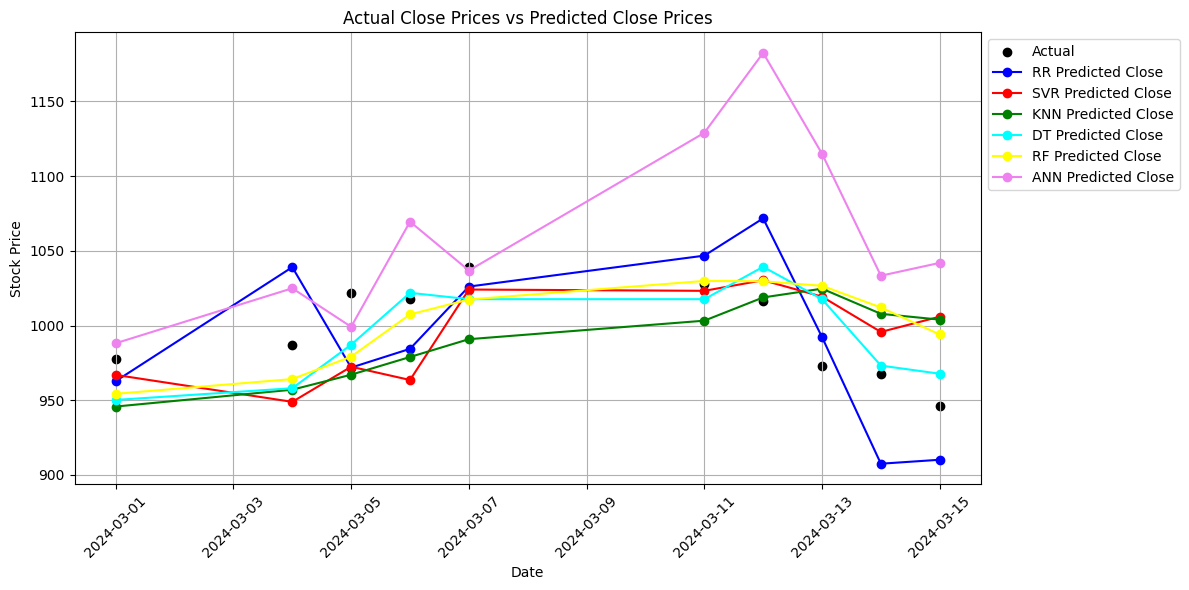

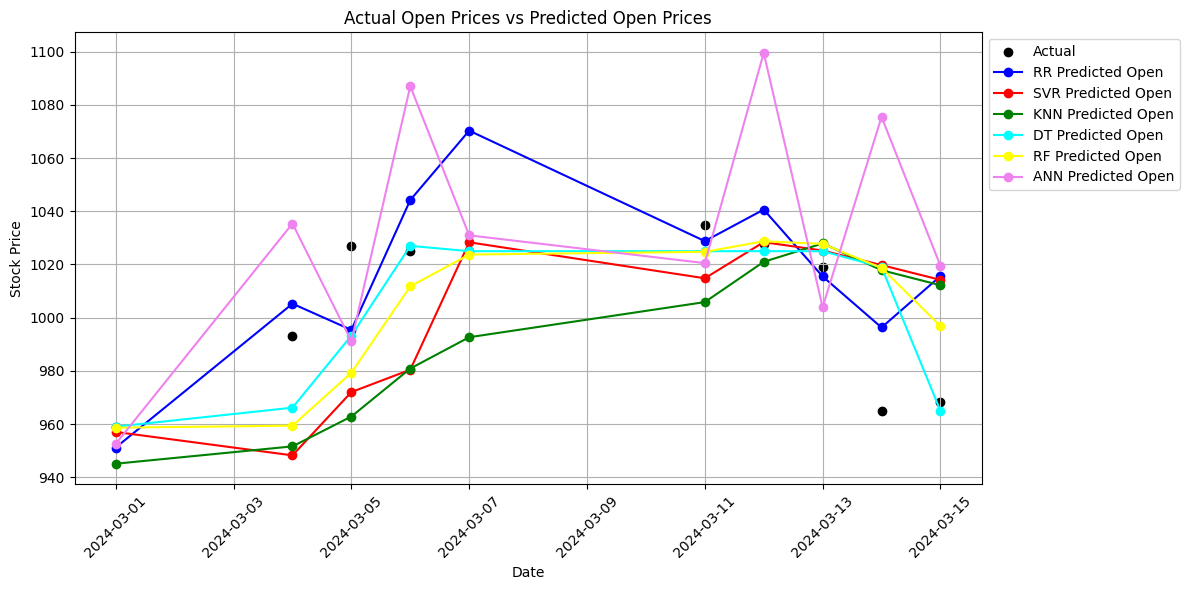

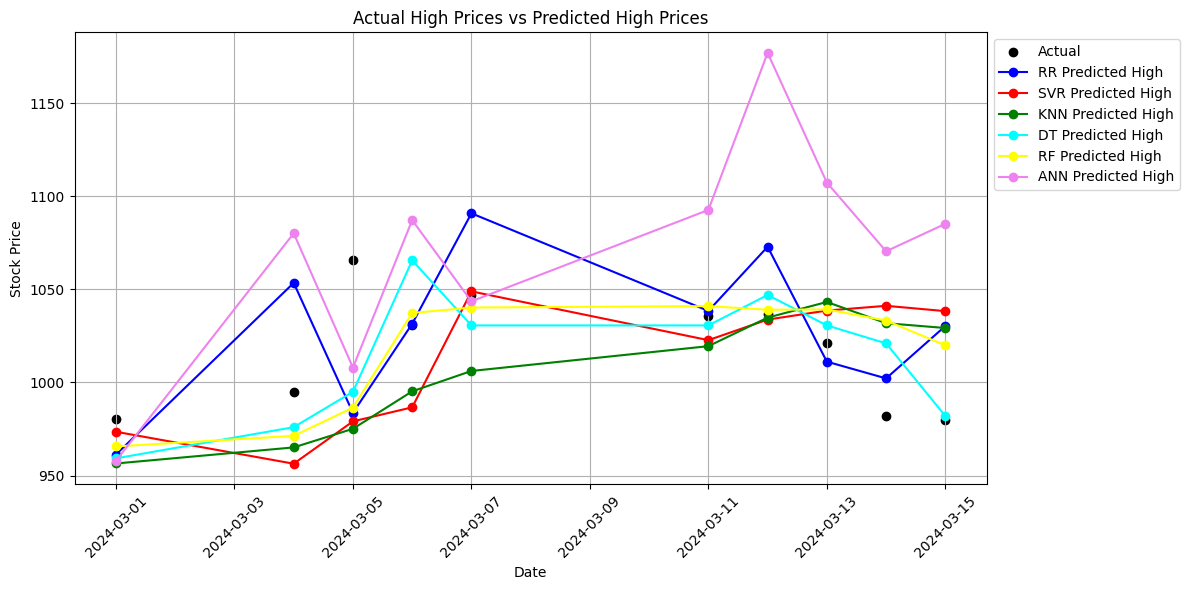

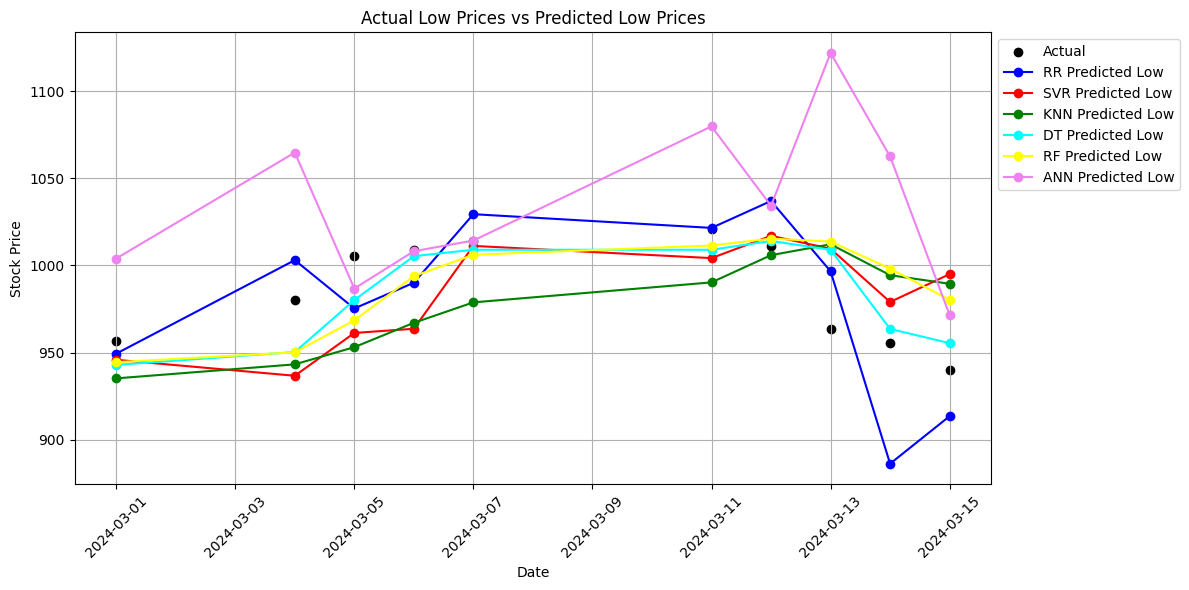

In [17]:
import matplotlib.pyplot as plt

# Plot actual and predicted close prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Close'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Close'], marker='o', label='RR Predicted Close', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Close'], marker='o', label='SVR Predicted Close', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Close'], marker='o', label='KNN Predicted Close', color='green')
plt.plot(result_df.index, result_df['DT Predicted Close'], marker='o', label='DT Predicted Close', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Close'], marker='o', label='RF Predicted Close', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Close'], marker='o', label='ANN Predicted Close', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Close Prices vs Predicted Close Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted open prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Open'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Open'], marker='o', label='RR Predicted Open', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Open'], marker='o', label='SVR Predicted Open', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Open'], marker='o', label='KNN Predicted Open', color='green')
plt.plot(result_df.index, result_df['DT Predicted Open'], marker='o', label='DT Predicted Open', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Open'], marker='o', label='RF Predicted Open', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Open'], marker='o', label='ANN Predicted Open', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Open Prices vs Predicted Open Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted high prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual High'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted High'], marker='o', label='RR Predicted High', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted High'], marker='o', label='SVR Predicted High', color='red')
plt.plot(result_df.index, result_df['KNN Predicted High'], marker='o', label='KNN Predicted High', color='green')
plt.plot(result_df.index, result_df['DT Predicted High'], marker='o', label='DT Predicted High', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted High'], marker='o', label='RF Predicted High', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted High'], marker='o', label='ANN Predicted High', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual High Prices vs Predicted High Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted low prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Low'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Low'], marker='o', label='RR Predicted Low', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Low'], marker='o', label='SVR Predicted Low', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Low'], marker='o', label='KNN Predicted Low', color='green')
plt.plot(result_df.index, result_df['DT Predicted Low'], marker='o', label='DT Predicted Low', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Low'], marker='o', label='RF Predicted Low', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Low'], marker='o', label='ANN Predicted Low', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Low Prices vs Predicted Low Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
if result == "Fluctuations":
    result_df['Proposed Model'] = result_df['RF Predicted Close']*0.6+result_df['DT Predicted Close']*0.3+result_df['RR Predicted Close']*0.1
else:
    result_df['Proposed Model'] = result_df['RR Predicted Close']*0.6+result_df['DT Predicted Close']*0.3+result_df['RF Predicted Close']*0.1
result_df['Proposed Model']

2024-03-01     953.928092
2024-03-04     969.828796
2024-03-05     980.867378
2024-03-06    1009.501839
2024-03-07    1018.363056
2024-03-11    1027.887303
2024-03-12    1036.745513
2024-03-13    1020.489975
2024-03-14     989.975999
2024-03-15     977.750206
Name: Proposed Model, dtype: float64

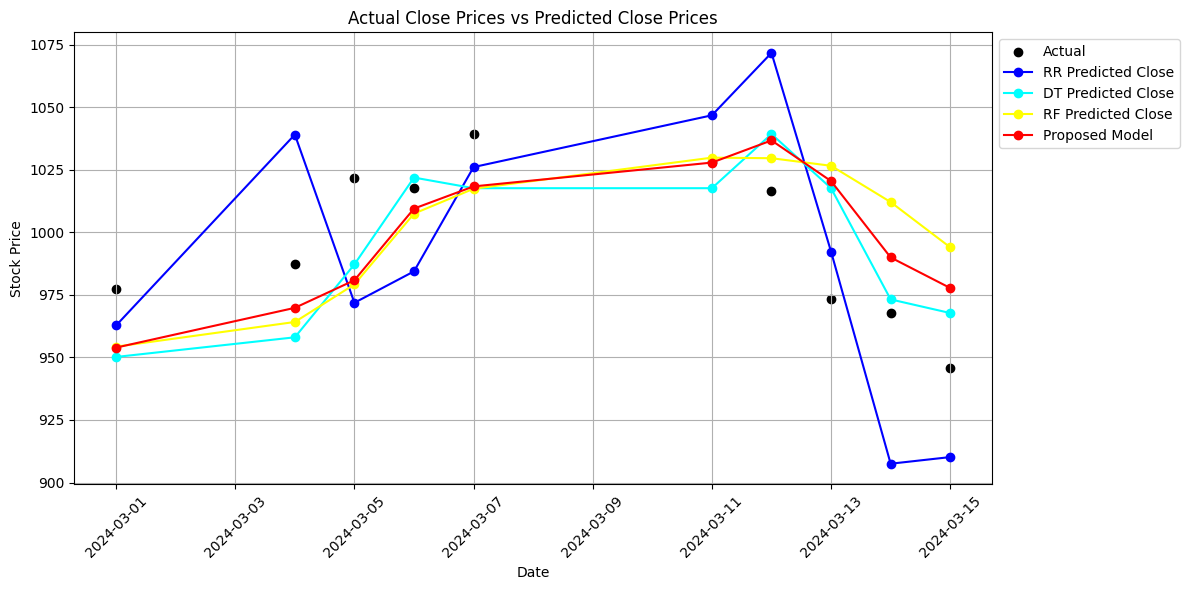

In [19]:
import matplotlib.pyplot as plt

# Plot actual and predicted close prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Close'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Close'], marker='o', label='RR Predicted Close', color='blue')
plt.plot(result_df.index, result_df['DT Predicted Close'], marker='o', label='DT Predicted Close', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Close'], marker='o', label='RF Predicted Close', color='yellow')
plt.plot(result_df.index, result_df['Proposed Model'], marker='o', label='Proposed Model', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Close Prices vs Predicted Close Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15} |  {:<15} |  {:<15} |  {:<15} |  {:<15}  | {:<15}".format('RR Predicted Close', 'SVR Predicted Close', 'KNN Predicted Close', 'DT Predicted Close', 'RF Predicted Close', 'ANN Predicted Close', 'Proposed Model'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['RR Predicted Close'], row['SVR Predicted Close'], row['KNN Predicted Close'], row['DT Predicted Close'], row['RF Predicted Close'], row['ANN Predicted Close'], row['Proposed Model']))


RR Predicted Close   |  SVR Predicted Close |  KNN Predicted Close |  DT Predicted Close |  RF Predicted Close |  ANN Predicted Close  | Proposed Model 
962.79086112      |   966.95689849      |   945.79000244       |    950.20001221      |   954.31500366      |   988.15180972      |   953.92809197   
1039.08190182     |   948.92334111      |   957.06000977       |    958.04998779      |   964.17601501      |   1024.94675637     |   969.82879553   
971.85565761      |   972.43695100      |   967.11000977       |    987.20001221      |   979.20301392      |   999.15677428      |   980.86737777   
984.41419928      |   963.55539558      |   978.95001221       |    1021.90002441     |   1007.48402039     |   1069.51944096     |   1009.50183948  
1026.08834733     |   1024.10520065     |   990.87001953       |    1017.65002441     |   1017.43202393     |   1036.83510342     |   1018.36305641  
1046.78672979     |   1023.23058818     |   1003.25002441      |    1017.65002441     |   1029.85

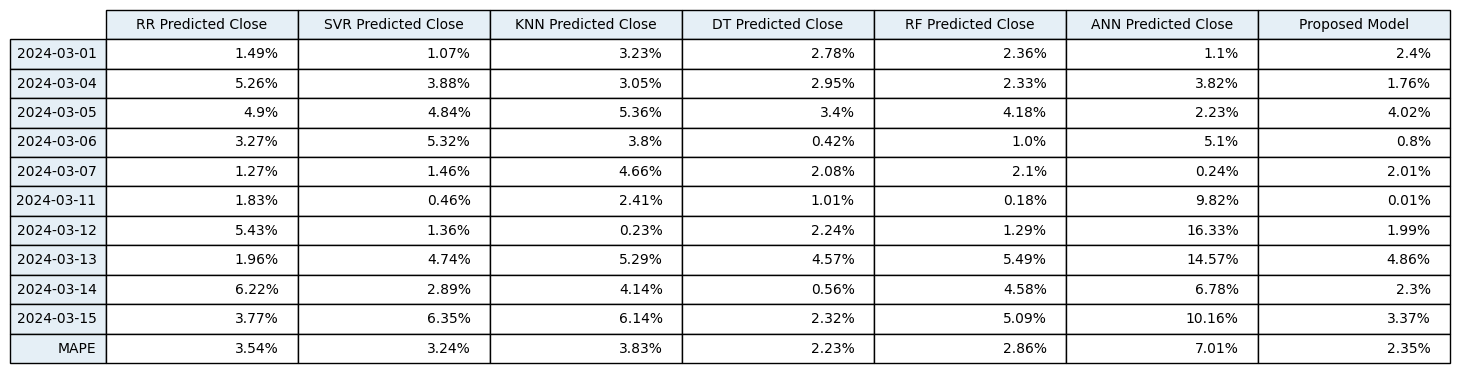

In [21]:
# Initialize the data with headers
data = [
    ['RR Predicted Close', 'SVR Predicted Close', 'KNN Predicted Close', 'DT Predicted Close', 'RF Predicted Close', 'ANN Predicted Close'
     , 'Proposed Model']
]

# Calculate the error metrics and update the data list
for index in result_df.index:
    actual_close = round(result_df.loc[index, 'Actual Close'], 2)
    rr_predicted_close = round(result_df.loc[index, 'RR Predicted Close'], 2)
    svr_predicted_close = round(result_df.loc[index, 'SVR Predicted Close'], 2)
    knn_predicted_close = round(result_df.loc[index, 'KNN Predicted Close'], 2)
    dt_predicted_close = round(result_df.loc[index, 'DT Predicted Close'], 2)
    rf_predicted_close = round(result_df.loc[index, 'RF Predicted Close'], 2)
    ann_predicted_close = round(result_df.loc[index, 'ANN Predicted Close'], 2)
    pm_predicted_close = round(result_df.loc[index, 'Proposed Model'], 2)
    
    rr_absolute_error = round(abs(actual_close - rr_predicted_close), 2)
    svr_absolute_error = round(abs(actual_close - svr_predicted_close), 2)
    knn_absolute_error = round(abs(actual_close - knn_predicted_close), 2)
    dt_absolute_error = round(abs(actual_close - dt_predicted_close), 2)
    rf_absolute_error = round(abs(actual_close - rf_predicted_close), 2)
    ann_absolute_error = round(abs(actual_close - ann_predicted_close), 2)
    pm_absolute_error = round(abs(actual_close - pm_predicted_close), 2)

    rr_error_percentage = round((rr_absolute_error / actual_close) * 100, 2) if actual_close != 0 else 0
    svr_error_percentage = round((svr_absolute_error / actual_close) * 100, 2) if actual_close != 0 else 0
    knn_error_percentage = round((knn_absolute_error / actual_close) * 100, 2) if actual_close != 0 else 0
    dt_error_percentage = round((dt_absolute_error / actual_close) * 100, 2) if actual_close != 0 else 0
    rf_error_percentage = round((rf_absolute_error / actual_close) * 100, 2) if actual_close != 0 else 0
    ann_error_percentage = round((ann_absolute_error / actual_close) * 100, 2) if actual_close != 0 else 0
    pm_error_percentage = round((pm_absolute_error / actual_close) * 100, 2) if actual_close != 0 else 0

    
    data.append([
        index.strftime('%Y-%m-%d'), 
        rr_error_percentage,
        svr_error_percentage,
        knn_error_percentage,
        dt_error_percentage,
        rf_error_percentage,
        ann_error_percentage,
        pm_error_percentage
    ])


# Calculate MAE, MSE, and MAPE
n = len(result_df)
rr_mape = round(100 * sum(abs(result_df['Actual Close'] - result_df['RR Predicted Close']) / result_df['Actual Close']) / n, 2)
svr_mape = round(100 * sum(abs(result_df['Actual Close'] - result_df['SVR Predicted Close']) / result_df['Actual Close']) / n, 2)
knn_mape = round(100 * sum(abs(result_df['Actual Close'] - result_df['KNN Predicted Close']) / result_df['Actual Close']) / n, 2)
dt_mape = round(100 * sum(abs(result_df['Actual Close'] - result_df['DT Predicted Close']) / result_df['Actual Close']) / n, 2)
rf_mape = round(100 * sum(abs(result_df['Actual Close'] - result_df['RF Predicted Close']) / result_df['Actual Close']) / n, 2)
ann_mape = round(100 * sum(abs(result_df['Actual Close'] - result_df['ANN Predicted Close']) / result_df['Actual Close']) / n, 2)
pm_mape = round(100 * sum(abs(result_df['Actual Close'] - result_df['Proposed Model']) / result_df['Actual Close']) / n, 2)


# Update the data list with MAE, MSE, and MAPE
data.append(['MAPE', rr_mape, svr_mape, knn_mape, dt_mape, rf_mape, ann_mape, pm_mape])


# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]
# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []
for row in data:
    formatted_row = []
    for i, x in enumerate(row):
        formatted_row.append(f'{x}%')
    cell_text.append(formatted_row)
    
# Reverse colors and text labels to display the last value at the top.
# colors = colors[::-1]
# cell_text.reverse()
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center',
                      fontsize=20
                      )
# Adjust layout to make room for the table:
plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)
# plt.ylabel("Loss in ${0}'s".format(value_increment))
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])


# plt.title('Linear Regression Prediction based on 1 week(7 Days) training datasets of Reliance Industries ')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.show()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
the_table.scale(3, 2)
plt.savefig('5. Errors_mape.png',
            bbox_inches='tight',
            dpi=150
            )

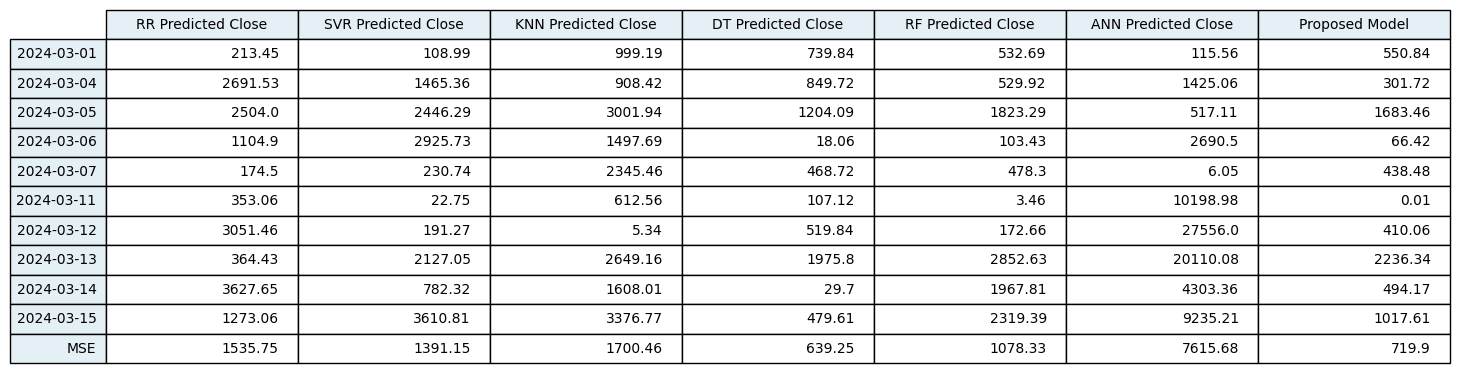

In [22]:
# Initialize the data with headers
data = [
    ['RR Predicted Close', 'SVR Predicted Close', 'KNN Predicted Close', 'DT Predicted Close', 'RF Predicted Close', 'ANN Predicted Close'
     , 'Proposed Model']
]

# Calculate the error metrics and update the data list
for index in result_df.index:
    actual_close = round(result_df.loc[index, 'Actual Close'], 2)
    rr_predicted_close = round(result_df.loc[index, 'RR Predicted Close'], 2)
    svr_predicted_close = round(result_df.loc[index, 'SVR Predicted Close'], 2)
    knn_predicted_close = round(result_df.loc[index, 'KNN Predicted Close'], 2)
    dt_predicted_close = round(result_df.loc[index, 'DT Predicted Close'], 2)
    rf_predicted_close = round(result_df.loc[index, 'RF Predicted Close'], 2)
    ann_predicted_close = round(result_df.loc[index, 'ANN Predicted Close'], 2)
    pm_predicted_close = round(result_df.loc[index, 'Proposed Model'], 2)
    
    rr_absolute_error = round(abs(actual_close - rr_predicted_close), 2)
    svr_absolute_error = round(abs(actual_close - svr_predicted_close), 2)
    knn_absolute_error = round(abs(actual_close - knn_predicted_close), 2)
    dt_absolute_error = round(abs(actual_close - dt_predicted_close), 2)
    rf_absolute_error = round(abs(actual_close - rf_predicted_close), 2)
    ann_absolute_error = round(abs(actual_close - ann_predicted_close), 2)
    pm_absolute_error = round(abs(actual_close - pm_predicted_close), 2)

    rr_error_square = round(rr_absolute_error ** 2, 2)
    svr_error_square = round(svr_absolute_error ** 2, 2)
    knn_error_square = round(knn_absolute_error ** 2, 2)
    dt_error_square = round(dt_absolute_error ** 2, 2)
    rf_error_square = round(rf_absolute_error ** 2, 2)
    ann_error_square = round(ann_absolute_error ** 2, 2)
    pm_error_square = round(pm_absolute_error ** 2, 2)
    
    data.append([
        index.strftime('%Y-%m-%d'), 
        rr_error_square,
        svr_error_square,
        knn_error_square,
        dt_error_square,
        rf_error_square,
        ann_error_square,
        pm_error_square,
    ])


# Calculate MAE, MSE, and MAPE
n = len(result_df)
rr_mse = round(sum((result_df['Actual Close'] - result_df['RR Predicted Close']) ** 2) / n, 2)
svr_mse = round(sum((result_df['Actual Close'] - result_df['SVR Predicted Close']) ** 2) / n, 2)
knn_mse = round(sum((result_df['Actual Close'] - result_df['KNN Predicted Close']) ** 2) / n, 2)
dt_mse = round(sum((result_df['Actual Close'] - result_df['DT Predicted Close']) ** 2) / n, 2)
rf_mse = round(sum((result_df['Actual Close'] - result_df['RF Predicted Close']) ** 2) / n, 2)
ann_mse = round(sum((result_df['Actual Close'] - result_df['ANN Predicted Close']) ** 2) / n, 2)
pm_mse = round(sum((result_df['Actual Close'] - result_df['Proposed Model']) ** 2) / n, 2)


# Update the data list with MAE, MSE, and MAPE
data.append(['MSE', rr_mse, svr_mse, knn_mse, dt_mse, rf_mse, ann_mse, pm_mse])


# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]
# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []
for row in data:
    formatted_row = []
    for i, x in enumerate(row):
        formatted_row.append(f'{x}' if isinstance(x, (int, float)) else x)
    cell_text.append(formatted_row)
    
# Reverse colors and text labels to display the last value at the top.
# colors = colors[::-1]
# cell_text.reverse()
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center',
                      fontsize=20
                      )
# Adjust layout to make room for the table:
plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)
# plt.ylabel("Loss in ${0}'s".format(value_increment))
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])


# plt.title('Linear Regression Prediction based on 1 week(7 Days) training datasets of Reliance Industries ')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.show()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
the_table.scale(3, 2)
plt.savefig('5. Errors_mse.png',
            bbox_inches='tight',
            dpi=150
            )

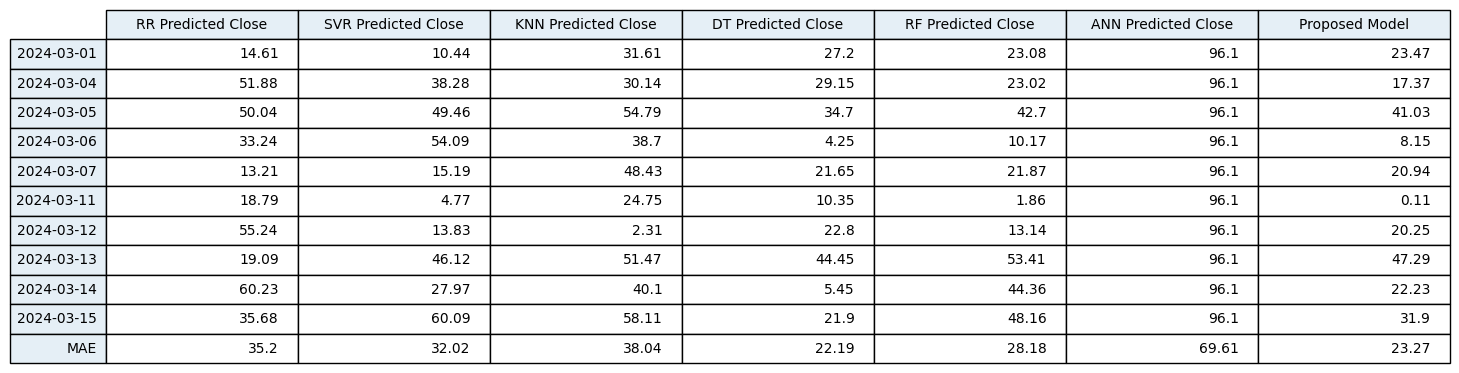

In [23]:
# Initialize the data with headers
data = [
    ['RR Predicted Close', 'SVR Predicted Close', 'KNN Predicted Close', 'DT Predicted Close', 'RF Predicted Close', 'ANN Predicted Close'
     , 'Proposed Model']
]

# Calculate the error metrics and update the data list
for index in result_df.index:
    actual_close = round(result_df.loc[index, 'Actual Close'], 2)
    rr_predicted_close = round(result_df.loc[index, 'RR Predicted Close'], 2)
    svr_predicted_close = round(result_df.loc[index, 'SVR Predicted Close'], 2)
    knn_predicted_close = round(result_df.loc[index, 'KNN Predicted Close'], 2)
    dt_predicted_close = round(result_df.loc[index, 'DT Predicted Close'], 2)
    rf_predicted_close = round(result_df.loc[index, 'RF Predicted Close'], 2)
    ann_predicted_close = round(result_df.loc[index, 'ANN Predicted Close'], 2)
    pm_predicted_close = round(result_df.loc[index, 'Proposed Model'], 2)
    
    rr_absolute_error = round(abs(actual_close - rr_predicted_close), 2)
    svr_absolute_error = round(abs(actual_close - svr_predicted_close), 2)
    knn_absolute_error = round(abs(actual_close - knn_predicted_close), 2)
    dt_absolute_error = round(abs(actual_close - dt_predicted_close), 2)
    rf_absolute_error = round(abs(actual_close - rf_predicted_close), 2)
    pm_absolute_error = round(abs(actual_close - pm_predicted_close), 2)
    
    data.append([
        index.strftime('%Y-%m-%d'), 
        rr_absolute_error,
        svr_absolute_error,
        knn_absolute_error,
        dt_absolute_error,
        rf_absolute_error,
        ann_absolute_error,
        pm_absolute_error
        
    ])


# Calculate MAE, MSE, and MAPE
n = len(result_df)
rr_mae = round(sum(abs(result_df['Actual Close'] - result_df['RR Predicted Close'])) / n, 2)
svr_mae = round(sum(abs(result_df['Actual Close'] - result_df['SVR Predicted Close'])) / n, 2)
knn_mae = round(sum(abs(result_df['Actual Close'] - result_df['KNN Predicted Close'])) / n, 2)
dt_mae = round(sum(abs(result_df['Actual Close'] - result_df['DT Predicted Close'])) / n, 2)
rf_mae = round(sum(abs(result_df['Actual Close'] - result_df['RF Predicted Close'])) / n, 2)
ann_mae = round(sum(abs(result_df['Actual Close'] - result_df['ANN Predicted Close'])) / n, 2)
pm_mae = round(sum(abs(result_df['Actual Close'] - result_df['Proposed Model'])) / n, 2)


# Update the data list with MAE, MSE, and MAPE
data.append(['MAE', rr_mae, svr_mae, knn_mae, dt_mae, rf_mae, ann_mae, pm_mae])


# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]
# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []
for row in data:
    formatted_row = []
    for i, x in enumerate(row):
        formatted_row.append(f'{x}' if isinstance(x, (int, float)) else x)
    cell_text.append(formatted_row)
    
# Reverse colors and text labels to display the last value at the top.
# colors = colors[::-1]
# cell_text.reverse()
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center',
                      fontsize=20
                      )
# Adjust layout to make room for the table:
plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)
# plt.ylabel("Loss in ${0}'s".format(value_increment))
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])


# plt.title('Linear Regression Prediction based on 1 week(7 Days) training datasets of Reliance Industries ')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.show()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
the_table.scale(3, 2)
plt.savefig('5. Errors_mae.png',
            bbox_inches='tight',
            dpi=150
            )

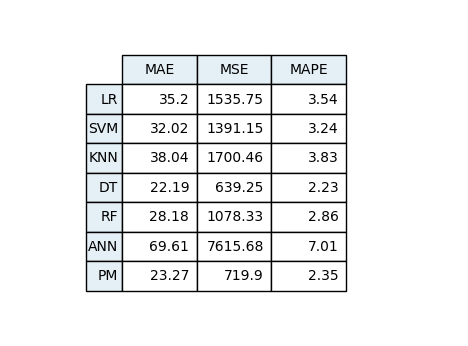

In [24]:
# Update the columns of the `data` list
errors = [
    ['MAE', 'MSE', 'MAPE']
]
errors.append(['LR', rr_mae, rr_mse, rr_mape])
errors.append(['SVM', svr_mae, svr_mse, svr_mape])
errors.append(['KNN', knn_mae, knn_mse, knn_mape])
errors.append(['DT', dt_mae, dt_mse, dt_mape])
errors.append(['RF', rf_mae, rf_mse, rf_mape])
errors.append(['ANN', ann_mae, ann_mse, ann_mape])
errors.append(['PM', pm_mae, pm_mse, pm_mape])

# Pop the headers from the data array
column_headers = errors.pop(0)
row_headers = [x.pop(0) for x in errors]
# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []

for row in errors:
    cell_text.append([f'{x}' for x in row])
# Reverse colors and text labels to display the last value at the top.
# colors = colors[::-1]
# cell_text.reverse()
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center'
                      )
# Adjust layout to make room for the table:
plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)
# plt.ylabel("Loss in ${0}'s".format(value_increment))
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
# plt.title('Linear Regression Prediction based on 1 week(7 Days) training datasets of Reliance Industries ')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.show()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
the_table.scale(0.5, 2)
plt.savefig('10. Error Comparison.png',
            bbox_inches='tight',
            dpi=150
            )